In [1]:
from scimath.units.length import meters as m
from scimath.units.length import kilometers as km
from scimath.units.length import light_year as ly
from scimath.units.mass import kilograms as kg
from scimath.units.time import seconds as s
from scimath.units.time import years as yr
from scimath.units.length import astronomical_unit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.constants import G, c, solar_mass, g
from src.utils import v_escape_solar
from src.engine import Engine
from src.starship import Starship
from src.solar_sail import SolarSail
from src.swimmer import Swimmer
%matplotlib inline

## Inertia Mission Planning

This notebook is for planning mission scenarios discussed in the novel

## Mission and Ship Parameters

In [2]:
initial_fuel_mass = 6.6e10 * kg
sail_area_density = 0.00003 * kg / m**2  # Carbon nanotube sheets
sail_radius = 6371 * km
sail_mass = sail_radius**2 * np.pi * sail_area_density
print(f'Sail mass is {sail_mass / kg} kg')
solar_sail = SolarSail(sail_mass, sail_radius, reflectivity=0.98)
total_distance = 4.244 * ly
payload_mass = 6.6e10 * kg

initial_distance_to_sun = 0.01 * astronomical_unit

fusion_acceleration = 0.0000070 * g

Sail mass is 3825483539.323412 kg


In [3]:
eng = {'main': Engine(initial_fuel_mass)}
ss = Starship(payload_mass, eng, solar_sail=solar_sail, destination_distance=total_distance)


ti = ss.time
ss.position = initial_distance_to_sun
ss.sail(None, 
        position_of_star=0.0 * m,
        max_accel=3.0 * g)
tf = ss.time
distance_after_sail = ss.position
print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')
expected_sail_velocity = ss.solar_sail.final_velocity(ss.total_mass() - ss.solar_sail.sail_mass, initial_distance_to_sun)
sail_velocity = ss.velocity
print(f'Achieved {ss.velocity / expected_sail_velocity * 100}% of the target final velocity of {sail_velocity / c}c.')
# print(f'Sail time is {(tf - ti) / (3600 * 24 * s)} days.')
ss.accelerate(fuel_mass=0.6 * initial_fuel_mass, acceleration=fusion_acceleration)
ss.cruise(total_distance - ss.position - distance_after_sail)

ss.solar_sail.stellar_luminosity = 	0.001567 * ss.solar_sail.stellar_luminosity
target_velocity = ss.solar_sail.final_velocity(ss.total_mass() - ss.solar_sail.sail_mass, 0.003 * initial_distance_to_sun)
print(target_velocity, sail_velocity)
ss.accelerate(target_velocity=target_velocity, direction=-1, acceleration=fusion_acceleration)


print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')
ss.sail(0.0 * c,
        total_distance,
        max_accel=3.0 * g
        )
# try:
#     ss.accelerate(direction=-1)
# except ValueError:
#     ss.accelerate(direction=-1, fuel_mass=ss.fuel_mass())
# ss.wait(10 * yr)
ss.print_history()


destination_distance: 4.244ly, position: 2.0260824358123243e-05ly
Achieved 90.50496654129421% of the target final velocity of 0.0015049709893758224c.
428051.7303323855*m*s**-1 451178.9521236697*m*s**-1
destination_distance: 4.244ly, position: 4.344658361456155ly


{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Sailing with velocity 0.000999999999999332 m/s with acceleration 3.0000000000000004g.
{'time': 3.397893306147916e-05*s, 'position': 1495980000.0*m, 'velocity': 0.000999999999999332*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Sailing with velocity 0.01099999999999265 m/s with acceleration 3.0000000000000004g.
{'time': 0.0003737682636762707*s, 'position': 1495980000.000002*m, 'velocity': 0.01099999999999265*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Sailing with velocity 0.11099999999992584 m/s with acceleration 3.0g.
{'time': 0.003771661569824187*s, 'position': 1495980000.0002093*m, 'velocity': 0.110999999999

<ipython-input-4-08476407d92d>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


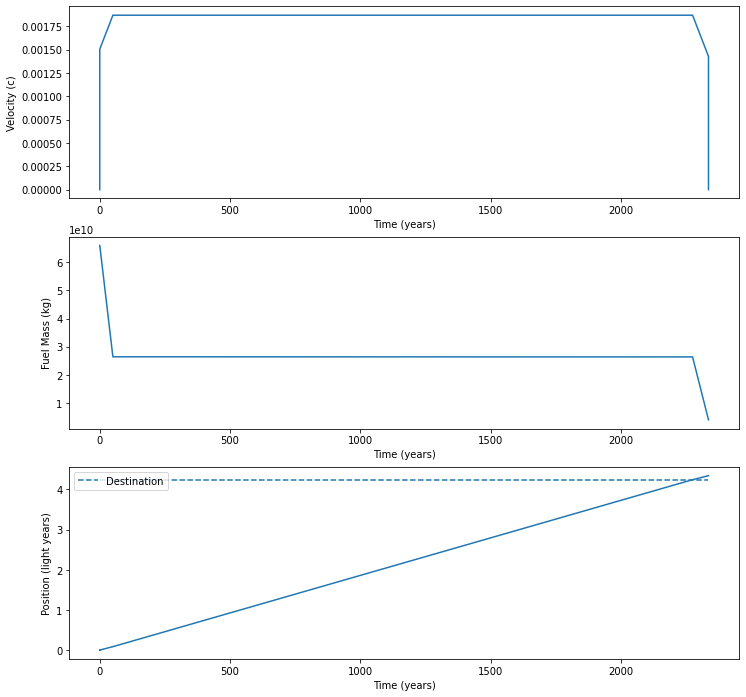

In [4]:
fig = ss.plot_history(show_destination=True)
fig.show()

## Example: Naive mission abort

In [5]:
eng = {'main': Engine(initial_fuel_mass)}
ss = Starship(payload_mass, eng, solar_sail=solar_sail, destination_distance=total_distance)


ti = ss.time
ss.position = initial_distance_to_sun
ss.sail(None, 
        position_of_star=0.0 * m,
        max_accel=3.0 * g)
tf = ss.time
distance_after_sail = ss.position
print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')
expected_sail_velocity = ss.solar_sail.final_velocity(ss.total_mass() - ss.solar_sail.sail_mass, initial_distance_to_sun)
sail_velocity = ss.velocity
print(f'Achieved {ss.velocity / expected_sail_velocity * 100}% of the target final velocity of {sail_velocity / c}c.')
# print(f'Sail time is {(tf - ti) / (3600 * 24 * s)} days.')
ss.accelerate(fuel_mass=0.6 * initial_fuel_mass, acceleration=fusion_acceleration)
ss.accelerate(fuel_mass=0.999 * ss.fuel_mass(), direction=-1, acceleration=fusion_acceleration)

print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')

# try:
#     ss.accelerate(direction=-1)
# except ValueError:
#     ss.accelerate(direction=-1, fuel_mass=ss.fuel_mass())
ss.print_history()

destination_distance: 4.244ly, position: 1.6137723172625696e-06ly
Achieved 94.42885369211028% of the target final velocity of 6.215769942833436e-05c.
destination_distance: 4.244ly, position: 0.024858113755674375ly


{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Sailing with velocity 0.0009999999999993298 m/s with acceleration 0.013119066904349452g.
{'time': 0.007770125720651787*s, 'position': 1495980000.0000038*m, 'velocity': 0.0009999999999993298*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Sailing with velocity 0.010999999999990344 m/s with acceleration 0.013119066904346454g.
{'time': 0.08547138292716966*s, 'position': 1495980000.0004702*m, 'velocity': 0.010999999999990344*m*s**-1, 'fuel_mass': 65999999999.99999*kg}

year 0.0 - Sailing with velocity 0.11099999999755802 m/s with acceleration 0.013119066904039143g.
{'time': 0.8624839549923484*s, 'position': 1495980000.0478678*m, 'velocity': 0.11099999999755802*m*s**-1, 'fu

<ipython-input-6-08476407d92d>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


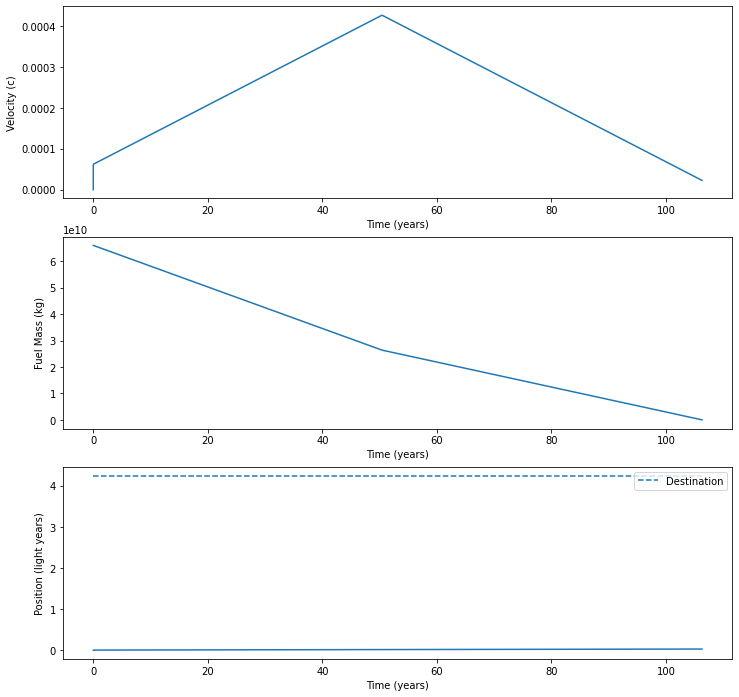

In [6]:
fig = ss.plot_history(show_destination=True)
fig.show()

## Example: SWIMMER mission abort

In [7]:
graphene_density = 0.763e-6 * kg / m ** 2
pusher_area = np.pi * (7.0e8 * m) ** 2
swimmer = Swimmer(pusher_area, graphene_density)
eng = {'main': Engine(initial_fuel_mass)}
ss = Starship(payload_mass, eng, solar_sail=solar_sail, destination_distance=total_distance)


# ss.wait(10 * yr)
ti = ss.time
ss.position = initial_distance_to_sun
ss.sail(None, 
        0.0 * m,
        max_accel=3.0 * g)
tf = ss.time
distance_after_sail = ss.position
print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')
expected_sail_velocity = ss.solar_sail.final_velocity(ss.total_mass() - ss.solar_sail.sail_mass, initial_distance_to_sun)
sail_velocity = ss.velocity
print(f'Achieved {ss.velocity / expected_sail_velocity * 100}% of the target final velocity of {sail_velocity / c}c.')
# print(f'Sail time is {(tf - ti) / (3600 * 24 * s)} days.')
ss.accelerate(fuel_mass=0.6 * initial_fuel_mass, acceleration=fusion_acceleration)


swim_power = 7.0e13 * kg * m ** 2 / s ** 3
ss.swimmer = swimmer
ss.payload_mass -= ss.swimmer.pusher_mass()
# TODO: We will likely want to run engines at slow speeds.
ss.swim(swim_power, 12 * yr, direction=-1)
ss.accelerate(fuel_mass=0.2 * initial_fuel_mass, acceleration=0.0000070 * g, direction=-1)
ss.swim(swim_power, 10 * yr, direction=-1)
ss.cruise(ss.position - distance_after_sail)
# ss.accelerate(target_velocity=sail_velocity, decelerate=True, acceleration=0.0000058 * g)

print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')

ss.sail(0.0 * c,
        total_distance,
        max_accel=3.0 * g
        )
try:
    ss.accelerate()
except ValueError:
    ss.accelerate(fuel_mass=ss.fuel_mass())
# ss.wait(10 * yr)
ss.print_history()


destination_distance: 4.244ly, position: 1.6137723172625696e-06ly
Achieved 94.42885369211028% of the target final velocity of 6.215769942833436e-05c.
destination_distance: 4.244ly, position: 1.613772317262652e-06ly


{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Sailing with velocity 0.0009999999999993298 m/s with acceleration 0.013119066904349452g.
{'time': 0.007770125720651787*s, 'position': 1495980000.0000038*m, 'velocity': 0.0009999999999993298*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Sailing with velocity 0.010999999999990344 m/s with acceleration 0.013119066904346454g.
{'time': 0.08547138292716966*s, 'position': 1495980000.0004702*m, 'velocity': 0.010999999999990344*m*s**-1, 'fuel_mass': 65999999999.99999*kg}

year 0.0 - Sailing with velocity 0.11099999999755802 m/s with acceleration 0.013119066904039143g.
{'time': 0.8624839549923484*s, 'position': 1495980000.0478678*m, 'velocity': 0.11099999999755802*m*s**-1, 'f

No handles with labels found to put in legend.
<ipython-input-8-c92773e2b07a>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


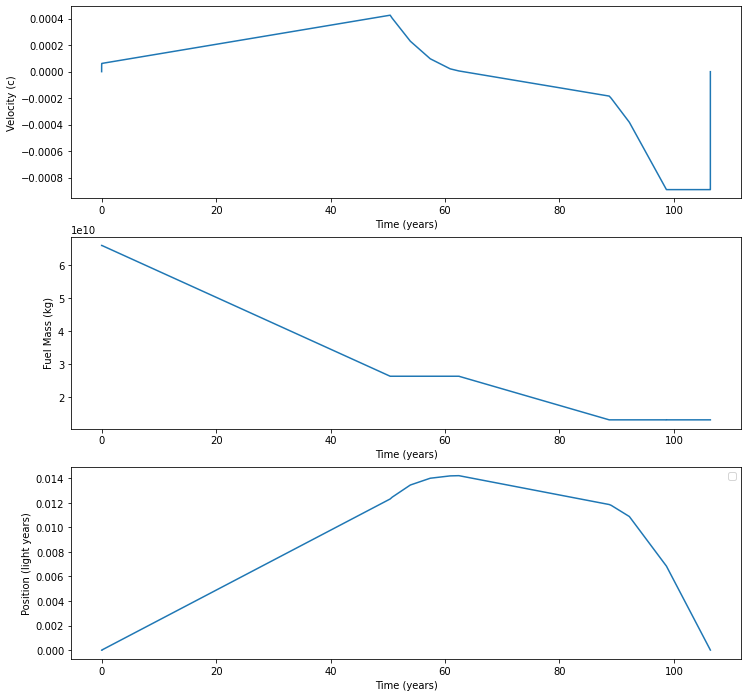

In [8]:
fig = ss.plot_history(show_destination=False)
fig.show()